In [1]:
import pandas as pd
import numpy as np
import datetime
from sqlalchemy import create_engine
from pandas.io import sql
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\HP\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The sav

# Read fiels

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

# Database

In [3]:
# Create database
engine = create_engine('sqlite:///C:/Users/HP/Desktop/Work/Bootcamp/SDAIA/Week3&4/sqlite-tools-win32-x86-3360000/sqlite-tools-win32-x86-3360000/turnstile.db', echo=True)

In [4]:
# Insert data to database
week_nums = [210605,210612,210619,210626,210703,210710,210717,210724,210731,210807,210814,210821,210828,210904]
sql.to_sql(get_data(week_nums), con=engine, name='turnstile',if_exists='replace',index=False)

2021-09-30 00:30:39,262 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-09-30 00:30:39,263 INFO sqlalchemy.engine.base.Engine ()
2021-09-30 00:30:39,266 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-09-30 00:30:39,268 INFO sqlalchemy.engine.base.Engine ()
2021-09-30 00:30:39,273 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("turnstile")
2021-09-30 00:30:39,276 INFO sqlalchemy.engine.base.Engine ()
2021-09-30 00:30:39,279 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("turnstile")
2021-09-30 00:30:39,283 INFO sqlalchemy.engine.base.Engine ()
2021-09-30 00:30:39,293 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE turnstile (
	"C/A" TEXT, 
	"UNIT" TEXT, 
	"SCP" TEXT, 
	"STATION" TEXT, 
	"LINENAME" TEXT, 
	"DIVISION" TEXT, 
	"DATE" TEXT, 
	"TIME" TEXT, 
	"DESC" TEXT, 
	"ENTRIES" BIGINT, 
	"EXITS                                                               " BIG

In [5]:
# Read from database
turnstiles_df = pd.read_sql_query("SELECT * FROM turnstile" ,engine)

2021-09-30 00:32:35,975 INFO sqlalchemy.engine.base.OptionEngine SELECT * FROM turnstile
2021-09-30 00:32:35,980 INFO sqlalchemy.engine.base.OptionEngine ()


In [6]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,00:00:00,REGULAR,7578734,2590325
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,04:00:00,REGULAR,7578740,2590327
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,08:00:00,REGULAR,7578749,2590340
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,12:00:00,REGULAR,7578789,2590386
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/29/2021,16:00:00,REGULAR,7578897,2590418
...,...,...,...,...,...,...,...,...,...,...,...
2932340,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,05:00:00,REGULAR,5554,638
2932341,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,09:00:00,REGULAR,5554,638
2932342,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,13:00:00,REGULAR,5554,638
2932343,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/03/2021,17:00:00,REGULAR,5554,638


# Cleaning and Preprocessing

In [7]:
# Take just 3 months: 6,7,8
turnstiles_df = turnstiles_df[(turnstiles_df['DATE'] > '05/31/2021') & (turnstiles_df['DATE'] < '09/01/2021')]

In [8]:
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
18,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,00:00:00,REGULAR,7579653,2590651
19,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,04:00:00,REGULAR,7579663,2590654
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,08:00:00,REGULAR,7579674,2590716
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,12:00:00,REGULAR,7579736,2590840
22,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/01/2021,16:00:00,REGULAR,7579916,2590894
...,...,...,...,...,...,...,...,...,...,...,...
2932321,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,05:00:00,REGULAR,5554,616
2932322,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,09:00:00,REGULAR,5554,616
2932323,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,13:00:00,RECOVR AUD,5554,616
2932324,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2021,17:00:00,REGULAR,5554,616


In [9]:
# Check if there is null value
turnstiles_df.isnull().sum()

C/A                                                                     0
UNIT                                                                    0
SCP                                                                     0
STATION                                                                 0
LINENAME                                                                0
DIVISION                                                                0
DATE                                                                    0
TIME                                                                    0
DESC                                                                    0
ENTRIES                                                                 0
EXITS                                                                   0
dtype: int64

In [10]:
# Strip the columns name
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [11]:
# Delete the column that will not used
turnstiles_df.drop(['LINENAME','DIVISION','DESC'], inplace=True, axis=1)
turnstiles_df

C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
18,A002,R051,02-00-00,59 ST,06/01/2021,00:00:00,7579653,2590651
19,A002,R051,02-00-00,59 ST,06/01/2021,04:00:00,7579663,2590654
20,A002,R051,02-00-00,59 ST,06/01/2021,08:00:00,7579674,2590716
21,A002,R051,02-00-00,59 ST,06/01/2021,12:00:00,7579736,2590840
22,A002,R051,02-00-00,59 ST,06/01/2021,16:00:00,7579916,2590894
...,...,...,...,...,...,...,...,...
2932321,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,05:00:00,5554,616
2932322,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,09:00:00,5554,616
2932323,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,13:00:00,5554,616
2932324,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,17:00:00,5554,616


In [12]:
# Take the date and time fields into a single datetime column
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, format="%m/%d/%Y %H:%M:%S")

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Check if there is duplicate entry
turnstiles_df[turnstiles_df[['C/A','UNIT','SCP','STATION','DATE_TIME']].duplicated()]

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
705360,N213,R154,00-00-00,TREMONT AV,06/23/2021,05:00:00,3682482,2760115,2021-06-23 05:00:00
705571,N213,R154,00-00-05,TREMONT AV,06/23/2021,05:00:00,369307075,100833056,2021-06-23 05:00:00
718511,N335,R158,01-00-03,KEW GARDENS,06/20/2021,18:30:00,5201960,17258853,2021-06-20 18:30:00
718554,N335,R158,01-00-04,KEW GARDENS,06/20/2021,18:30:00,6718777,26526664,2021-06-20 18:30:00
719015,N336,R158,00-00-05,KEW GARDENS,06/20/2021,18:30:00,8833758,2334263,2021-06-20 18:30:00
1654899,R514,R094,00-05-00,ASTORIA BLVD,07/22/2021,00:00:00,262243,0,2021-07-22 00:00:00
1654901,R514,R094,00-05-00,ASTORIA BLVD,07/22/2021,04:00:00,262243,0,2021-07-22 04:00:00
1654905,R514,R094,00-05-00,ASTORIA BLVD,07/22/2021,08:00:00,262243,0,2021-07-22 08:00:00
1654907,R514,R094,00-05-00,ASTORIA BLVD,07/22/2021,12:00:00,262243,0,2021-07-22 12:00:00
2494453,R523,R147,00-00-07,61 ST WOODSIDE,08/18/2021,05:00:00,22112575,4491111,2021-08-18 05:00:00


In [14]:
# Delete the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
turnstiles_df

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATE_TIME
2932325,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,21:00:00,5554,616,2021-08-31 21:00:00
2932324,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,17:00:00,5554,616,2021-08-31 17:00:00
2932323,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,13:00:00,5554,616,2021-08-31 13:00:00
2932322,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,09:00:00,5554,616,2021-08-31 09:00:00
2932321,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/31/2021,05:00:00,5554,616,2021-08-31 05:00:00
...,...,...,...,...,...,...,...,...,...
22,A002,R051,02-00-00,59 ST,06/01/2021,16:00:00,7579916,2590894,2021-06-01 16:00:00
21,A002,R051,02-00-00,59 ST,06/01/2021,12:00:00,7579736,2590840,2021-06-01 12:00:00
20,A002,R051,02-00-00,59 ST,06/01/2021,08:00:00,7579674,2590716,2021-06-01 08:00:00
19,A002,R051,02-00-00,59 ST,06/01/2021,04:00:00,7579663,2590654,2021-06-01 04:00:00


In [16]:
turnstiles_df.reset_index(drop = True,inplace = True)

# Exploratory Data Analysis (EDA)

In [17]:
# Take the maximum value of each turnstile for each date
turnstiles_daily = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)['ENTRIES','EXITS'].max()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [18]:
turnstiles_daily

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,06/01/2021,7580178,2590917
1,A002,R051,02-00-00,59 ST,06/02/2021,7580754,2591200
2,A002,R051,02-00-00,59 ST,06/03/2021,7581328,2591445
3,A002,R051,02-00-00,59 ST,06/04/2021,7581863,2591617
4,A002,R051,02-00-00,59 ST,06/05/2021,7582248,2591700
...,...,...,...,...,...,...,...
459518,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/27/2021,5554,614
459519,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/28/2021,5554,615
459520,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/29/2021,5554,616
459521,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/30/2021,5554,616


In [19]:
# Store the PREV_ENTRIES and PREV_EXITS for each row
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (turnstiles_daily.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES","EXITS"].apply(lambda grp: grp.shift(1)))

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [20]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [21]:
# Check for the turnstiles that the cmulative number of ENTRIES or EXITS come reveres
turnstiles_daily[(turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]) | (turnstiles_daily["EXITS"] < turnstiles_daily["PREV_EXITS"]) ]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
3589,A011,R080,01-03-00,57 ST-7 AV,06/02/2021,885601049,489575017,06/01/2021,8.856013e+08,4.895759e+08
3590,A011,R080,01-03-00,57 ST-7 AV,06/03/2021,885600810,489574126,06/02/2021,8.856010e+08,4.895750e+08
3591,A011,R080,01-03-00,57 ST-7 AV,06/04/2021,885600584,489573250,06/03/2021,8.856008e+08,4.895741e+08
3592,A011,R080,01-03-00,57 ST-7 AV,06/05/2021,885600355,489572377,06/04/2021,8.856006e+08,4.895732e+08
3593,A011,R080,01-03-00,57 ST-7 AV,06/06/2021,885600163,489571614,06/05/2021,8.856004e+08,4.895724e+08
...,...,...,...,...,...,...,...,...,...,...
455663,R730,R431,00-00-04,EASTCHSTER/DYRE,08/28/2021,1559799524,1728254710,08/27/2021,1.559800e+09,1.728255e+09
455664,R730,R431,00-00-04,EASTCHSTER/DYRE,08/29/2021,1559799443,1728254732,08/28/2021,1.559800e+09,1.728255e+09
455665,R730,R431,00-00-04,EASTCHSTER/DYRE,08/30/2021,1559799422,1728254826,08/29/2021,1.559799e+09,1.728255e+09
455666,R730,R431,00-00-04,EASTCHSTER/DYRE,08/31/2021,1559799298,1728254931,08/30/2021,1.559799e+09,1.728255e+09


In [22]:
# To solve the problem of reverse ENTRIES
def get_daily_counts_entries(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily['DAILY_ENTRIES'] = turnstiles_daily.apply(get_daily_counts_entries, axis=1, max_counter=1000000)

In [23]:
# To solve the problem of reverse EXITS
def get_daily_counts_exits(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        #print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
turnstiles_daily['DAILY_EXITS'] = turnstiles_daily.apply(get_daily_counts_exits, axis=1, max_counter=1000000)

In [24]:
# Sum DAILY_ENTRIES and DAILY_EXITS
turnstiles_daily['SUM_DAILY_ENTRIES_DAILY_EXITS'] = turnstiles_daily['DAILY_ENTRIES'] + turnstiles_daily['DAILY_EXITS'] 

In [25]:
# Find the station_daily ENTRIES and EXITS
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['SUM_DAILY_ENTRIES_DAILY_EXITS']].sum().reset_index()
station_daily

,STATION,DATE,SUM_DAILY_ENTRIES_DAILY_EXITS
0,1 AV,06/02/2021,21060.0
1,1 AV,06/03/2021,20875.0
2,1 AV,06/04/2021,21762.0
3,1 AV,06/05/2021,19085.0
4,1 AV,06/06/2021,16614.0
...,...,...,...
34455,ZEREGA AV,08/27/2021,2237.0
34456,ZEREGA AV,08/28/2021,1351.0
34457,ZEREGA AV,08/29/2021,1362.0
34458,ZEREGA AV,08/30/2021,2176.0


In [26]:
# Find: day, week, month
station_daily['DAY'] = pd.to_datetime(station_daily['DATE']).dt.dayofweek
station_daily['WEEK'] = pd.to_datetime(station_daily['DATE']).dt.week
station_daily['MONTH'] = pd.to_datetime(station_daily['DATE']).dt.month

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Find the station_totals ENTRIES and EXITS
station_totals = station_daily.groupby('STATION').sum().sort_values('SUM_DAILY_ENTRIES_DAILY_EXITS', ascending=False).reset_index()
station_totals

,STATION,SUM_DAILY_ENTRIES_DAILY_EXITS,DAY,WEEK,MONTH
0,34 ST-PENN STA,11080099.0,273,2574,639
1,34 ST-HERALD SQ,8376579.0,273,2574,639
2,FULTON ST,7617145.0,273,2574,639
3,PATH NEW WTC,7235349.0,273,2574,639
4,86 ST,7097257.0,273,2574,639
...,...,...,...,...,...
374,BEACH 98 ST,49793.0,273,2574,639
375,BEACH 105 ST,35356.0,273,2574,639
376,TOMPKINSVILLE,25506.0,273,2574,639
377,BROAD CHANNEL,16901.0,273,2574,639


## Top 10 Stations With The Most Number of People

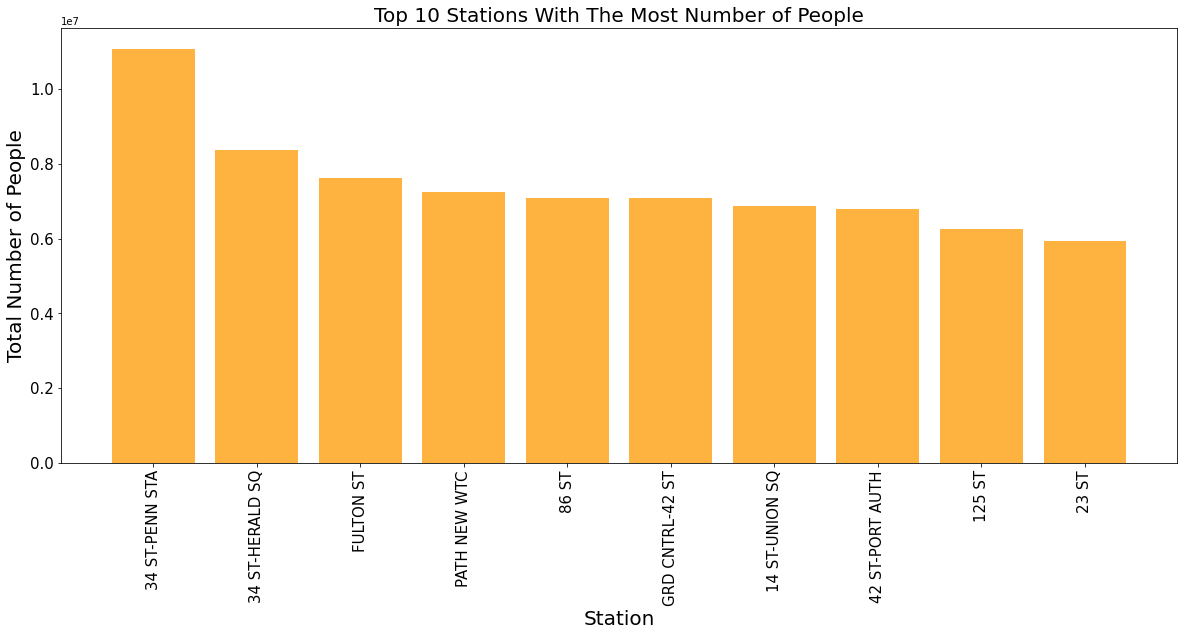

In [28]:
#top 10 stations that have the most people
plt.figure(figsize=(20,8))
plt.bar(x=station_totals['STATION'][:10], height=station_totals['SUM_DAILY_ENTRIES_DAILY_EXITS'][:10], 
        color = sns.color_palette("YlOrBr")[2])
plt.xlabel('Station',fontsize=20)
plt.ylabel('Total Number of People',fontsize=20)
plt.title('Top 10 Stations With The Most Number of People',fontsize=20)
plt.xticks(rotation=90, fontsize = 15);
plt.yticks(fontsize = 15);

## More Analysis for Top 3 Stations

## Percentage of People in the Top 3 Stations

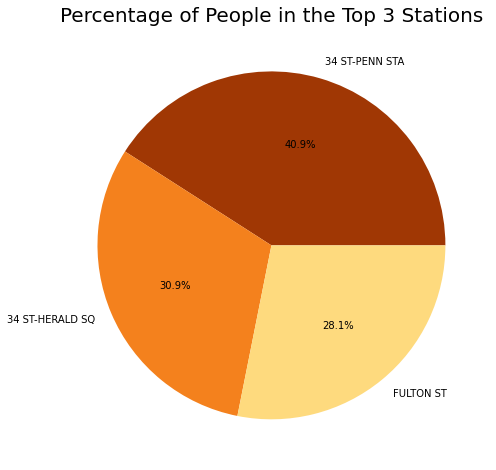

In [29]:
plt.figure(figsize=(20,8));
station_totals_top_3 = station_totals[:3].groupby("STATION")['SUM_DAILY_ENTRIES_DAILY_EXITS'].sum().sort_values(ascending = False)
plt.pie(station_totals_top_3.values, labels = station_totals_top_3.index,autopct='%1.1f%%', 
        colors = sns.color_palette("YlOrBr")[::-2]);

plt.title('Percentage of People in the Top 3 Stations',fontsize=20);

### Month

In [30]:
station_daily_top_3 = station_daily[(station_daily['STATION'] == '34 ST-PENN STA') | (station_daily['STATION'] == '34 ST-HERALD SQ') | (station_daily['STATION'] == 'FULTON ST')]
station_daily_top_3

,STATION,DATE,SUM_DAILY_ENTRIES_DAILY_EXITS,DAY,WEEK,MONTH
5367,34 ST-HERALD SQ,06/02/2021,83577.0,2,22,6
5368,34 ST-HERALD SQ,06/03/2021,80334.0,3,22,6
5369,34 ST-HERALD SQ,06/04/2021,1248995.0,4,22,6
5370,34 ST-HERALD SQ,06/05/2021,64890.0,5,22,6
5371,34 ST-HERALD SQ,06/06/2021,53229.0,6,22,6
...,...,...,...,...,...,...
20645,FULTON ST,08/27/2021,59561.0,4,34,8
20646,FULTON ST,08/28/2021,37367.0,5,34,8
20647,FULTON ST,08/29/2021,32557.0,6,34,8
20648,FULTON ST,08/30/2021,57439.0,0,35,8


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


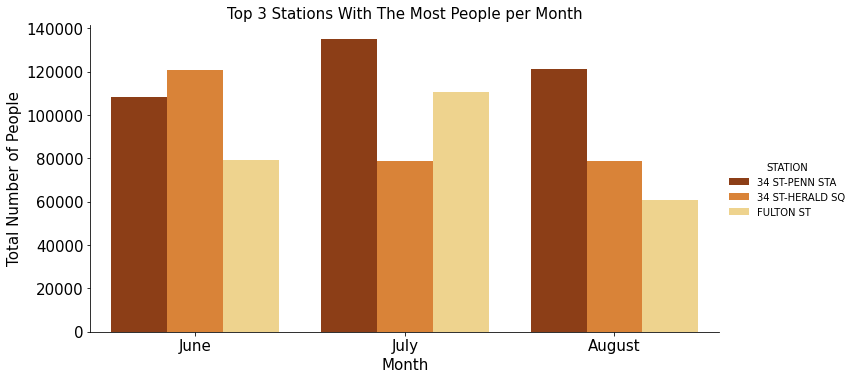

In [31]:
sns.factorplot(x='MONTH', y='SUM_DAILY_ENTRIES_DAILY_EXITS', hue='STATION', data=station_daily_top_3, kind='bar',
               hue_order=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST'], palette = sns.color_palette("YlOrBr")[::-2],
               height=5,aspect = 2,ci=None);
plt.xlabel('Month',fontsize=15)
plt.ylabel('Total Number of People',fontsize=15)
plt.title('Top 3 Stations With The Most People per Month',fontsize=15)
plt.xticks(np.arange(3),['June','July','August'],fontsize = 15);
plt.yticks(fontsize = 15);

### Week

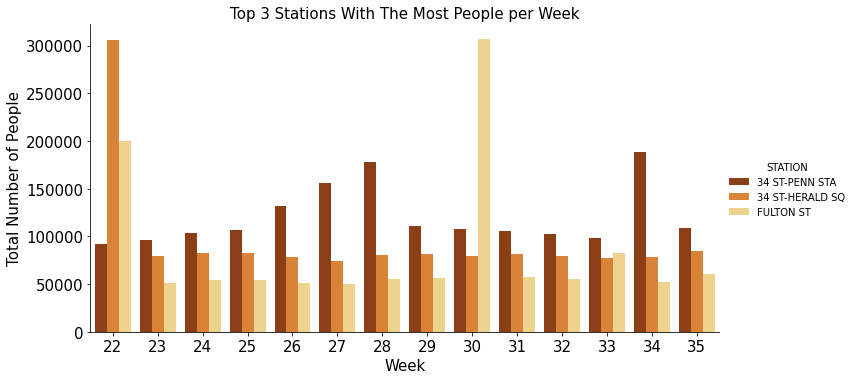

In [32]:
sns.factorplot(x='WEEK', y='SUM_DAILY_ENTRIES_DAILY_EXITS', hue='STATION', data=station_daily_top_3, kind='bar',
               hue_order=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST'],  palette = sns.color_palette("YlOrBr")[::-2],
               height=5,aspect = 2,ci=None);
plt.xlabel('Week',fontsize=15)
plt.ylabel('Total Number of People',fontsize=15)
plt.title('Top 3 Stations With The Most People per Week',fontsize=15)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

### Day

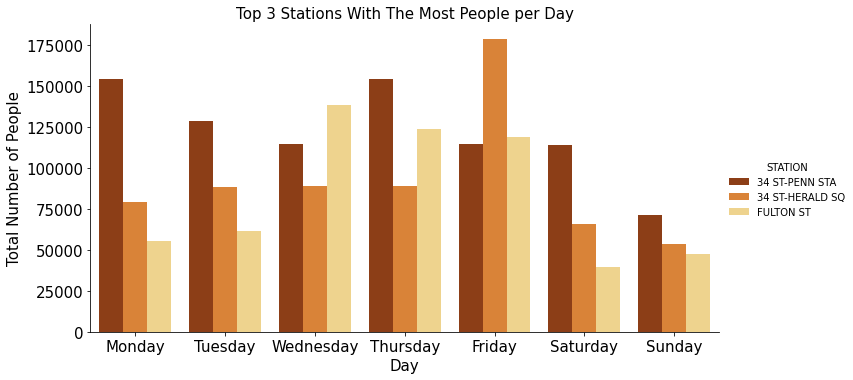

In [33]:
sns.factorplot(x='DAY', y='SUM_DAILY_ENTRIES_DAILY_EXITS', hue='STATION', data=station_daily_top_3, kind='bar',
               hue_order=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST'], palette = sns.color_palette("YlOrBr")[::-2],
               height=5,aspect = 2,ci=None);

plt.xlabel('Day',fontsize=15)
plt.ylabel('Total Number of People',fontsize=15)
plt.title('Top 3 Stations With The Most People per Day',fontsize=15)
plt.xticks(np.arange(7),['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],fontsize = 15);
plt.yticks(fontsize = 15);

### Hour

In [34]:
# Take the maximum value of each turnstile for each date-time
turnstiles = turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","TIME"],as_index=False)['ENTRIES','EXITS'].max()
# Store the PREV_ENTRIES and PREV_EXITS for each row
turnstiles[["PREV_DATE", "PREV_ENTRIES","PREV_EXITS"]] = (turnstiles.groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES","EXITS"].apply(lambda grp: grp.shift(1)))
# Drop the rows for the earliest date in the df
turnstiles.dropna(subset=["PREV_DATE"], axis=0, inplace=True)
# Solve the reverse proplem
turnstiles['DAILY_ENTRIES'] = turnstiles.apply(get_daily_counts_entries, axis=1, max_counter=1000000)
turnstiles['DAILY_EXITS'] = turnstiles.apply(get_daily_counts_exits, axis=1, max_counter=1000000)
# Sum DAILY_ENTRIES and DAILY_EXITS
turnstiles['SUM_DAILY_ENTRIES_DAILY_EXITS'] = turnstiles['DAILY_ENTRIES'] + turnstiles['DAILY_EXITS'] 

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [35]:
station_time = turnstiles.groupby(["STATION", "TIME"])[['SUM_DAILY_ENTRIES_DAILY_EXITS']].sum().reset_index()
station_time

,STATION,TIME,SUM_DAILY_ENTRIES_DAILY_EXITS
0,1 AV,00:00:00,963623.0
1,1 AV,04:00:00,73366.0
2,1 AV,08:00:00,168066.0
3,1 AV,08:12:05,124.0
4,1 AV,09:26:34,433.0
...,...,...,...
84935,ZEREGA AV,05:00:00,4790.0
84936,ZEREGA AV,09:00:00,50162.0
84937,ZEREGA AV,13:00:00,31817.0
84938,ZEREGA AV,17:00:00,47223.0


In [36]:
station_time_top_3 = station_time[(station_time['STATION'] == '34 ST-PENN STA') | (station_time['STATION'] == '34 ST-HERALD SQ') | (station_time['STATION'] == 'FULTON ST')]
station_time_top_3

,STATION,TIME,SUM_DAILY_ENTRIES_DAILY_EXITS
4106,34 ST-HERALD SQ,00:00:00,827019.0
4107,34 ST-HERALD SQ,04:00:00,146284.0
4108,34 ST-HERALD SQ,08:00:00,575807.0
4109,34 ST-HERALD SQ,12:00:00,2735140.0
4110,34 ST-HERALD SQ,16:00:00,1789439.0
4111,34 ST-HERALD SQ,20:00:00,2385310.0
4128,34 ST-PENN STA,00:00:00,755916.0
4129,34 ST-PENN STA,02:00:00,157718.0
4130,34 ST-PENN STA,04:00:00,142058.0
4131,34 ST-PENN STA,06:00:00,64062.0


In [37]:
# Find the hour
station_time_top_3['TIME'] = pd.to_datetime(station_time_top_3['TIME'])
station_time_top_3['HOUR']  = pd.to_datetime(station_time_top_3['TIME']).dt.hour

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


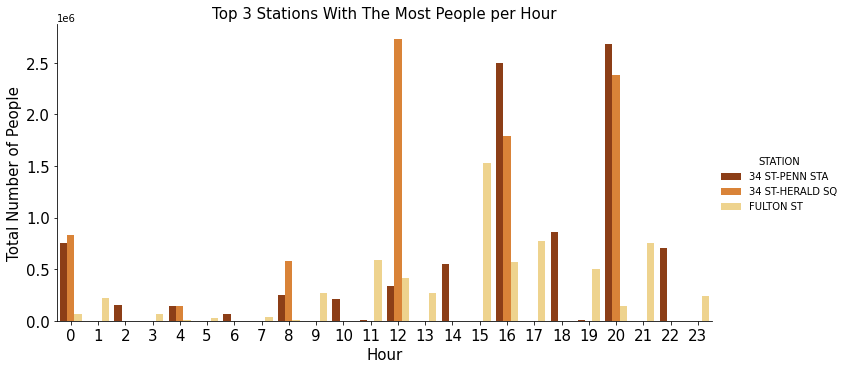

In [38]:
sns.factorplot(x='HOUR', y='SUM_DAILY_ENTRIES_DAILY_EXITS', hue='STATION', data=station_time_top_3, kind='bar'
               ,hue_order=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST'],palette = sns.color_palette("YlOrBr")[::-2],
               height=5,aspect = 2,ci=None);

plt.xlabel('Hour',fontsize=15)
plt.ylabel('Total Number of People',fontsize=15)
plt.title('Top 3 Stations With The Most People per Hour',fontsize=15)
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);

In [39]:
# Make a range of hour
Group1 = station_time_top_3[(station_time_top_3['HOUR'] >= 0) & (station_time_top_3['HOUR'] <= 3)]
Group2 = station_time_top_3[(station_time_top_3['HOUR'] >= 4) & (station_time_top_3['HOUR'] <= 7)]
Group3 = station_time_top_3[(station_time_top_3['HOUR'] >= 8) & (station_time_top_3['HOUR'] <= 11)]
Group4 = station_time_top_3[(station_time_top_3['HOUR'] >= 12) & (station_time_top_3['HOUR'] <= 15)]
Group5 = station_time_top_3[(station_time_top_3['HOUR'] >= 16) & (station_time_top_3['HOUR'] <= 19)]
Group6 = station_time_top_3[(station_time_top_3['HOUR'] >= 20) & (station_time_top_3['HOUR'] <= 23)]
Group1['HOUR'] = '1'
Group2['HOUR'] = '2'
Group3['HOUR'] = '3'
Group4['HOUR'] = '4'
Group5['HOUR'] = '5'
Group6['HOUR'] = '6'
hours_range = pd.concat([Group1,Group2,Group3,Group4,Group5,Group6])
hours_range = hours_range.groupby(['STATION','HOUR'])['SUM_DAILY_ENTRIES_DAILY_EXITS'].sum().reset_index()

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


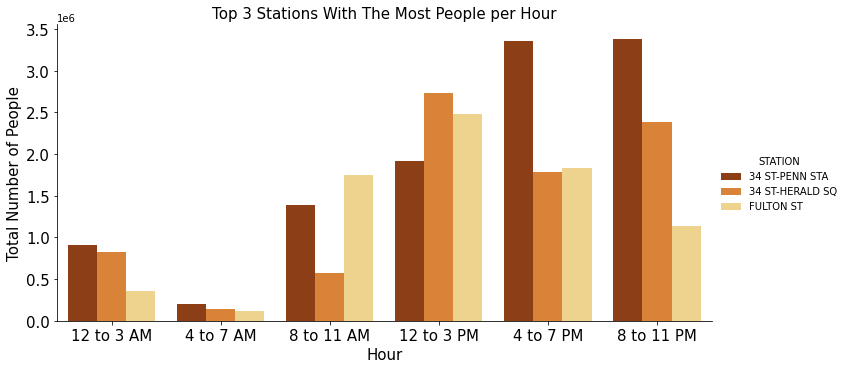

In [40]:
#Bar plot
sns.factorplot(x='HOUR', y='SUM_DAILY_ENTRIES_DAILY_EXITS', hue='STATION', data=hours_range, kind='bar',
               hue_order=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST'],
               palette = sns.color_palette("YlOrBr")[::-2],
               height=5,aspect = 2,ci=None);

plt.xlabel('Hour',fontsize=15)
plt.ylabel('Total Number of People',fontsize=15)
plt.title('Top 3 Stations With The Most People per Hour',fontsize=15)
plt.xticks(np.arange(6) ,['12 to 3 AM','4 to 7 AM','8 to 11 AM','12 to 3 PM','4 to 7 PM','8 to 11 PM'],fontsize = 15);
plt.yticks(fontsize = 15);

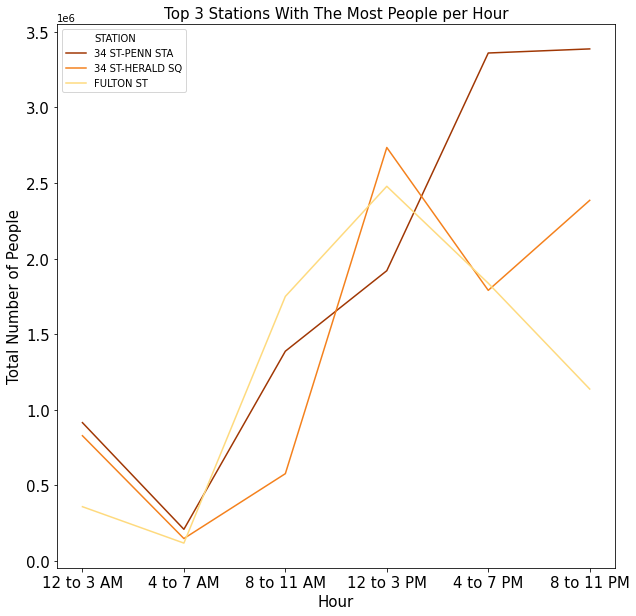

In [41]:
#Line plot
plt.figure(figsize=(10,10));
sns.lineplot(x='HOUR', y='SUM_DAILY_ENTRIES_DAILY_EXITS', hue='STATION', data=hours_range,
                 hue_order=['34 ST-PENN STA','34 ST-HERALD SQ','FULTON ST'],
                 palette = sns.color_palette("YlOrBr")[::-2], ci=False);

plt.xlabel('Hour',fontsize=15)
plt.ylabel('Total Number of People',fontsize=15)
plt.title('Top 3 Stations With The Most People per Hour',fontsize=15)
plt.xticks(np.arange(6) ,['12 to 3 AM','4 to 7 AM','8 to 11 AM','12 to 3 PM','4 to 7 PM','8 to 11 PM'],fontsize = 15);
plt.yticks(fontsize = 15);

# Conclusions and Recommendation
The goal of this project is to analyze the Metropolitan Transportation Authority (MTA) Turnstile Data to see which stations have a lot of people to help the Café chain to determine the places where they will open new branches.

To start exploring this goal, I will sum the daily entries and daily exits to find the total number of people that have passed through the station.

### Results:
- Top 3 stations with the most number of people are:34 ST-PENN STA, 34 ST-HERALD SQ, FULTON ST
- 34 ST-PENN STA has the most number of people in July and August, and 34 ST-HERALD SQ in June
- 34 ST-PENN STA always has the most number of people in each week except in weeks 22 and 30
- 34 ST-PENN STA has the most number of people on Monday and Thursday, 34 ST-HERALD SQ on Friday, and FULTON ST on Wednesday
- 34 ST-PENN STA has the most number of people between 4 to 11 PM, 34 ST-HERALD SQ between 12 to 3 PM and 8 to 11 PM, and FULTON ST between 12 to 3 PM

### Recommendation:
- I recommend for Café chain to open a new branch near to 34 ST-PENN STA station, make the day of opening on Monday or Thursday, and employed more employees between time 4 to 11 PM.